In [ ]:
#Задача 1. Классификация

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [2]:
# 1) Загрузка данных
train_path = "D:/Эстер/с рс/Courses/ML Engineer/HWEster26/archive1/train_dataset.csv"
test_path = "D:/Эстер/с рс/Courses/ML Engineer/HWEster26/archive1/test_dataset.csv"

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)


Пропуски в данных:
 age                    0.0
height(cm)             0.0
weight(kg)             0.0
waist(cm)              0.0
eyesight(left)         0.0
eyesight(right)        0.0
hearing(left)          0.0
hearing(right)         0.0
systolic               0.0
relaxation             0.0
fasting blood sugar    0.0
Cholesterol            0.0
triglyceride           0.0
HDL                    0.0
LDL                    0.0
hemoglobin             0.0
Urine protein          0.0
serum creatinine       0.0
AST                    0.0
ALT                    0.0
Gtp                    0.0
dental caries          0.0
smoking                0.0
dtype: float64

Основные статистики:
                        count        mean        std    min    25%    50%  \
age                  38984.0   44.127591  12.063564   20.0   40.0   40.0   
height(cm)           38984.0  164.689488   9.187507  130.0  160.0  165.0   
weight(kg)           38984.0   65.938718  12.896581   30.0   55.0   65.0   
waist(cm)        

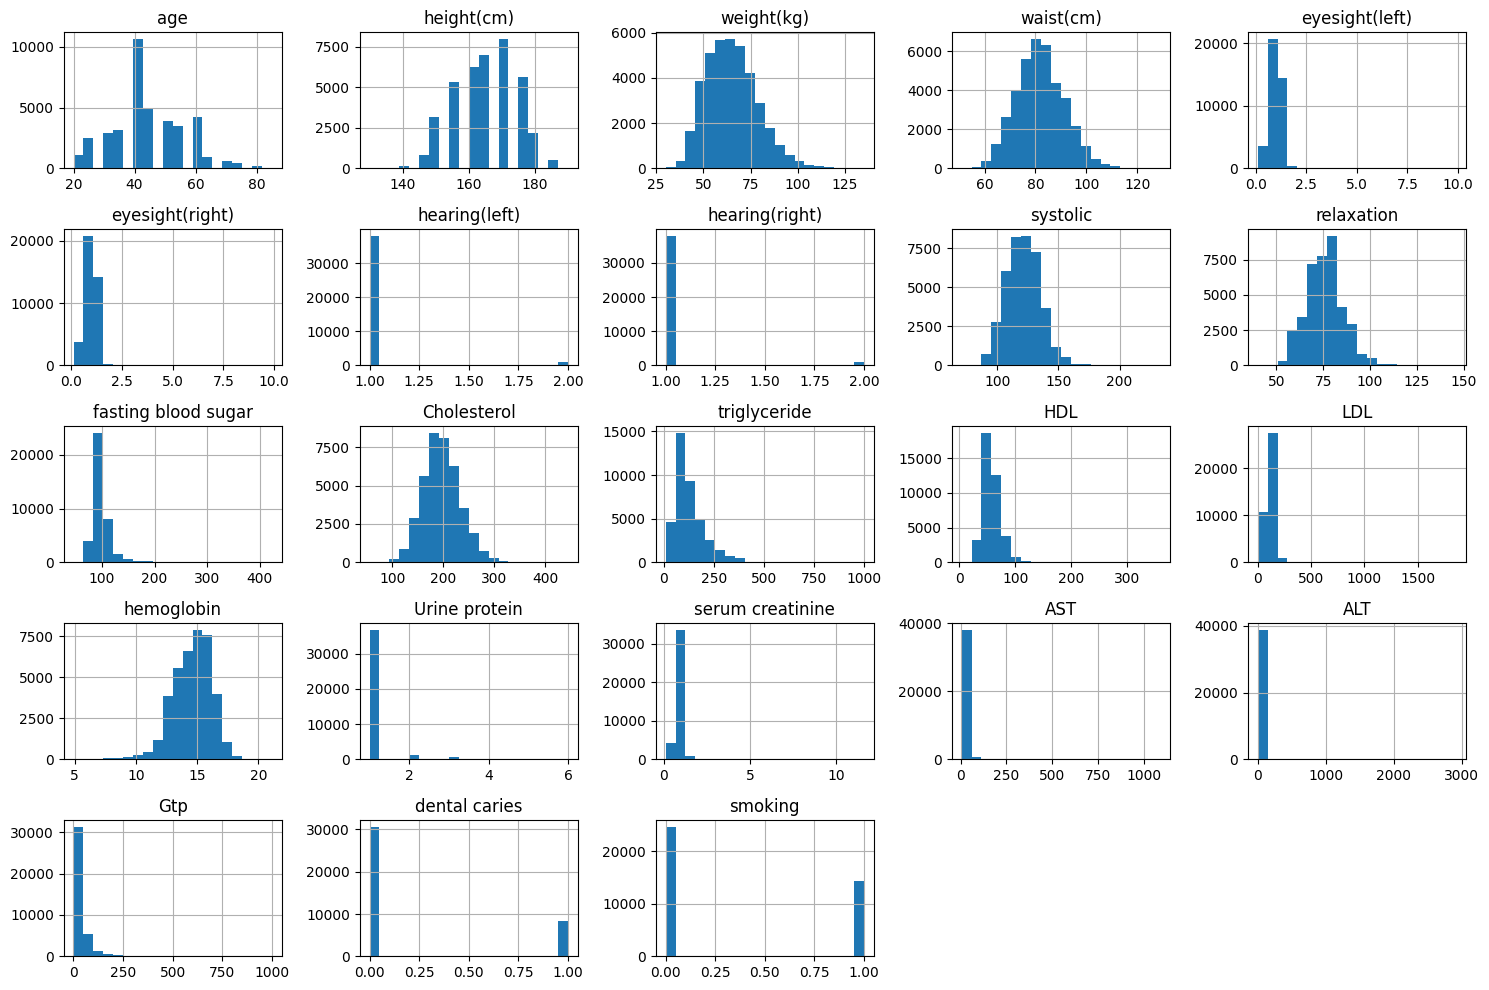

In [8]:
# 2) Анализ данных (EDA)
def data_analysis(df):
    print("Пропуски в данных:\n", df.isnull().sum() / len(df) * 100)
    print("\nОсновные статистики:\n", df.describe().T)
    
    # Визуализация распределений
    df.hist(figsize=(15, 10), bins=20)
    plt.tight_layout()
    plt.show()
    
# Анализируем тренировочный датасет
data_analysis(train_df)


In [5]:
# 3) Подготовка данных
X = train_df.drop(columns=["smoking"])  
y = train_df["smoking"]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [6]:
# 4) Обучение модели
params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}

model = GradientBoostingClassifier(random_state=42)
gs = GridSearchCV(model, params, cv=5, scoring='accuracy', n_jobs=-1)
gs.fit(X_train, y_train)

# Лучшая модель
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

In [7]:
# 5) Оценка качества классификации
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba))

Confusion Matrix:
 [[3966  967]
 [ 876 1988]]
Accuracy: 0.7636270360395023
Precision: 0.6727580372250423
Recall: 0.6941340782122905
F1 Score: 0.6832789139027324
ROC AUC: 0.8413083078616592


In [ ]:
#Задача 2. Регрессия

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [24]:
# 1) Загрузка данных для регрессии
train_path = "D:/Эстер/с рс/Courses/ML Engineer/HWEster26/acrhive2/train.csv"
test_path = "D:/Эстер/с рс/Courses/ML Engineer/HWEster26/acrhive2/test.csv"
sample_submission_path = "D:/Эстер/с рс/Courses/ML Engineer/HWEster26/acrhive2/sample_submission.csv"

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)


Пропуски в данных:
 id                       0.000000
Age                      1.558750
Gender                   0.000000
Annual Income            3.745750
Marital Status           1.544083
Number of Dependents     9.139333
Education Level          0.000000
Occupation              29.839583
Health Score             6.173000
Location                 0.000000
Policy Type              0.000000
Previous Claims         30.335750
Vehicle Age              0.000500
Credit Score            11.490167
Insurance Duration       0.000083
Policy Start Date        0.000000
Customer Feedback        6.485333
Smoking Status           0.000000
Exercise Frequency       0.000000
Property Type            0.000000
Premium Amount           0.000000
dtype: float64

Основные статистики:
                           count           mean            std         min  \
id                    1200000.0  599999.500000  346410.305851    0.000000   
Age                   1181295.0      41.145563      13.539950   18.000000 

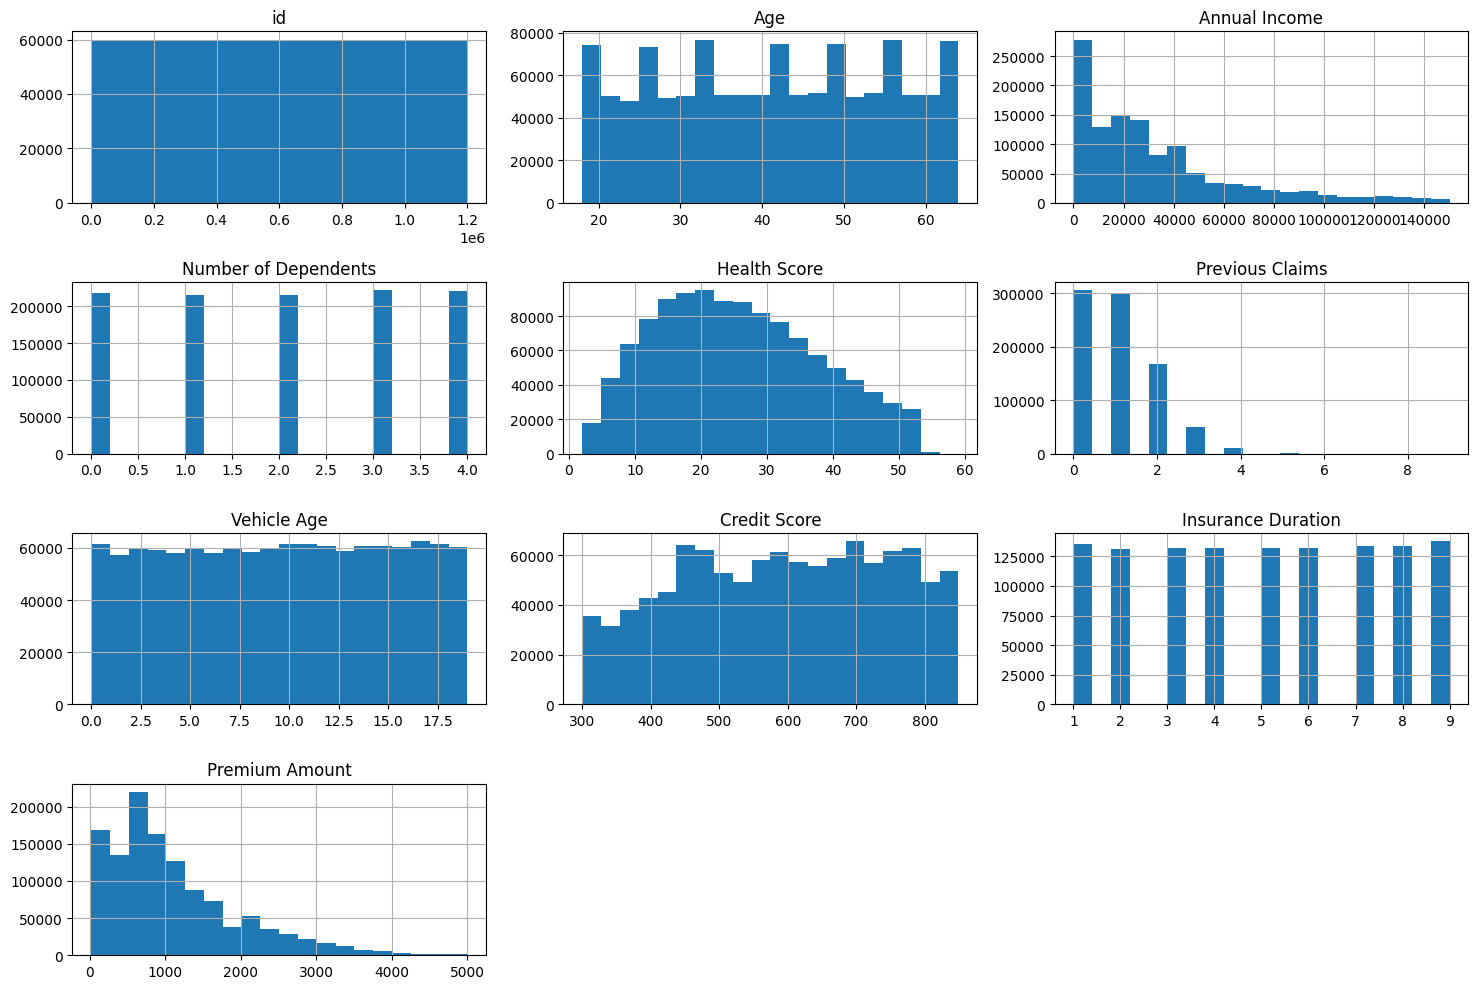

In [25]:
# 2) Анализ данных (EDA)
def data_analysis(df):
    print("Пропуски в данных:\n", df.isnull().sum() / len(df) * 100)
    print("\nОсновные статистики:\n", df.describe().T)
    
    # Визуализация распределений
    df.hist(figsize=(15, 10), bins=20)
    plt.tight_layout()
    plt.show()
    
data_analysis(train_df)

In [29]:
# Импортируем класс для работы с пропусками
from sklearn.impute import SimpleImputer

# 3) Подготовка данных для регрессии
# Удалим только ненужные признаки, оставив все остальные, включая целевую переменную
X = train_df.drop(columns=["Premium Amount", "id", "Policy Start Date", "Location", "Customer Feedback", "Occupation", "Gender", "Marital Status", "Education Level", "Smoking Status"])
y = train_df["Premium Amount"]

# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Обработка категориальных признаков с помощью One-Hot Encoding
categorical_columns = X.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_train_encoded = encoder.fit_transform(X_train[categorical_columns])
X_test_encoded = encoder.transform(X_test[categorical_columns])

# Преобразуем обратно в DataFrame для удобства
X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(categorical_columns))
X_test_encoded = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Теперь объединим обработанные категориальные признаки с оставшимися числовыми признаками
X_train = pd.concat([X_train.drop(columns=categorical_columns).reset_index(drop=True), X_train_encoded], axis=1)
X_test = pd.concat([X_test.drop(columns=categorical_columns).reset_index(drop=True), X_test_encoded], axis=1)

In [31]:
# 4) Обработка пропусков в данных
# Для числовых признаков используем стратегию заполнения медианой
imputer = SimpleImputer(strategy='median')

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


In [32]:
# 5) Обучение модели и поиск оптимальных гиперпараметров
model = GradientBoostingRegressor(random_state=42)

# Параметры для GridSearchCV
params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
}

gs = GridSearchCV(model, params, cv=5, scoring='r2', n_jobs=-1)
gs.fit(X_train, y_train)

# Лучшая модель регрессии
best_model = gs.best_estimator_

In [33]:
# 6) Оценка качества модели
y_pred = best_model.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")

MAE: 644.5984364838603
MSE: 716173.5194243318
R²: 0.04163343610224146
